In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
with open('../results/2022-10-25_17:57:33_results.json') as f:
    data = json.load(f)

In [32]:
loss0 = (data[0]['results']['total']['training_losses'][0])
total = 0
for i in range(len(loss0) - 1):
    if loss0[i+1] > loss0[i]:
        total += 1
print(total)

1154


In [33]:
for d in data:
    results = d['results']
    configs = d['configs']
    
    r2 = results['total']['r2score_val']
    r2_train = results['total']['r2score_train']
    print('train', '{0:.4}'.format(np.mean(r2_train)) + '\\pm {0:.3}'.format(np.std(r2_train)))
    print('val', '{0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}'.format(np.std(r2)))

train 0.9837\pm 6.49e-05
val 0.9793\pm 0.000232
train 0.989\pm 0.00013
val 0.9713\pm 0.000413
train 0.9943\pm 0.000108
val 0.9617\pm 0.000646


In [18]:
def getinfo(obj):
    infotoformat = {4: {}, 5: {}, 6: {}}
    for d in data:
        results = d['results']
        configs = d['configs']

        r2 = results['by_response'][obj]['r2score_val']

        infotoformat[
            configs['depth']
        ][configs['width']] = '${0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}$'.format(np.std(r2))
    
    return infotoformat

In [19]:
def formatinfo(vals, obj):
    print('''
        \\begin{table*}[htp!]
        \centering
         \\begin{tabular}{|c |c c c|} 
         \hline
         & Depth 4 & Depth 5 & Depth 6 \\\\
         \hline
         Width 50 & %s & %s & %s \\\\
         Width 75 & %s & %s & %s \\\\
         Width 100 & %s & %s & %s \\\\
         \hline
         \end{tabular}
         \caption{\label{tab:valr2}Aggregated validation set $R^2$ scores.}
        \end{table*}
    ''' % tuple(vals[depth][width] for depth in [4, 5, 6] for width in [50, 75, 100]))

In [20]:
def maketable(obj):
    vals = getinfo(obj)
    formatinfo(vals, obj)

In [21]:
for i in [1, 2, 3, 4, 5, 6]:
    maketable(f'OBJ{i}')

KeyError: 50

In [39]:
def compute_color(depth, width, alpha=1.):
    orange = (0.8, 0.3, 0.1)
    green = (0.4, 0.8, 0.4)
    blue = (0.1, 0.2, 0.8)
    #purple = (0.4, 0.1, 0.3)
    main = orange
    if width == 100:
        main = orange
    if width == 150:
        main = green
    if width == 200:
        main = blue
    return (*main, alpha*(.32*(depth-6)+0.85))

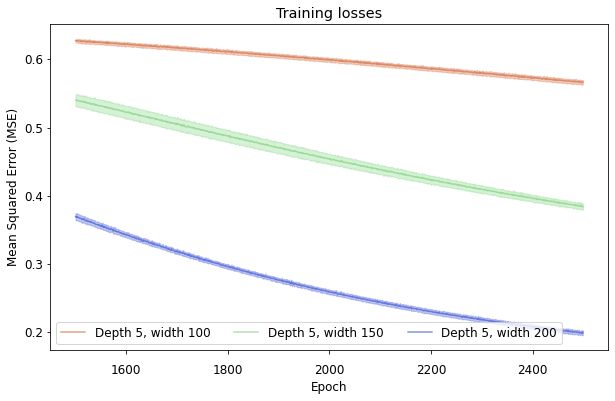

In [40]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))
epochs = list(range(1500, 2500))

plt.rc('font', **{'size': 12})

for d in data:
    depth = d['configs']['depth']
    width = d['configs']['width']
    losses = d['results']['total']['training_losses']
    means = np.mean(losses, axis=0)[-1000:]
    ax.plot(
        epochs, np.mean(d['results']['total']['training_losses'], axis=0)[-1000:],
        color=compute_color(depth, width),
        label=f'Depth {depth}, width {width}'
    )
    stds = np.std(losses, axis=0)[-1000:]
    ax.fill_between(epochs, means-stds, means+stds, color=compute_color(depth, width, alpha=0.5), edgecolor="none")
    
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
#plt.legend(bbox_to_anchor=(1.,0.5), ncol=3, loc='upper left')
plt.legend(ncol=3, loc='lower left')
ax.set_title('Training losses')
# plt.subplots_adjust(right=.2)
plt.savefig('training_losses.png', dpi=400)
plt.show()

In [43]:
# mapes
for d in data:
    configs = d['configs']
    print(configs)
    depth = configs['depth']; width = configs['width']
    
    results = d['results']
    for i in range(1, 7):
        print(f'OBJ{i}')
        obj_results = results['by_response'][f'OBJ{i}']
        print('train:', np.mean(obj_results['mape_train']), ' +- ', np.std(obj_results['mape_train']))
        print('val:', np.mean(obj_results['mape_val']), ' +- ', np.std(obj_results['mape_val']))

{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 100, 'activation_function': 'sigmoid', 'batchsize': 1024}
OBJ1
train: 0.014840312121250449  +-  0.0003523402078405622
val: 0.01643346059053343  +-  0.00042533223623305027
OBJ2
train: 0.017424857121453537  +-  7.423939267846024e-05
val: 0.01823591312553264  +-  7.758172898391565e-05
OBJ3
train: 0.014380013113738682  +-  0.00045591109393392664
val: 0.014792041394137598  +-  0.000532604988097874
OBJ4
train: 0.07462658613220072  +-  0.001393466463974498
val: 0.07588368088654143  +-  0.0011734796983714707
OBJ5
train: 0.10959637087754744  +-  0.000698220332838563
val: 0.11892785246451132  +-  0.000881977020098169
OBJ6
train: 0.10868090465029893  +-  0.001921762482784771
val: 0.11700243025016903  +-  0.0018895797108804265
{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 150, 'activation_function': 'sigmoid', 'batchsize': 1024}
OBJ1
train: 0.01612